In [2]:

import pandas as pd
import numpy as np
import bioread
import os
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy.interpolate import interp1d

         ECG B, X, ECG2-R  Digital input  EVENT  ECG R-R  Heart Rate
0               -0.169067            0.0    0.0    0.000    0.000000
1               -0.284729            0.0    0.0    0.000    0.000000
2               -0.397797            0.0    0.0    0.000    0.000000
3               -0.503845            0.0    0.0    0.000    0.000000
4               -0.607147            0.0    0.0    0.000    0.000000
...                   ...            ...    ...      ...         ...
4103278         -0.401459            0.0    0.0    0.602   99.667774
4103279         -0.377808            0.0    0.0    0.602   99.667774
4103280         -0.352173            0.0    0.0    0.602   99.667774
4103281         -0.320129            0.0    0.0    0.602   99.667774
4103282         -0.272522            0.0    0.0    0.602   99.667774

[4103283 rows x 5 columns]


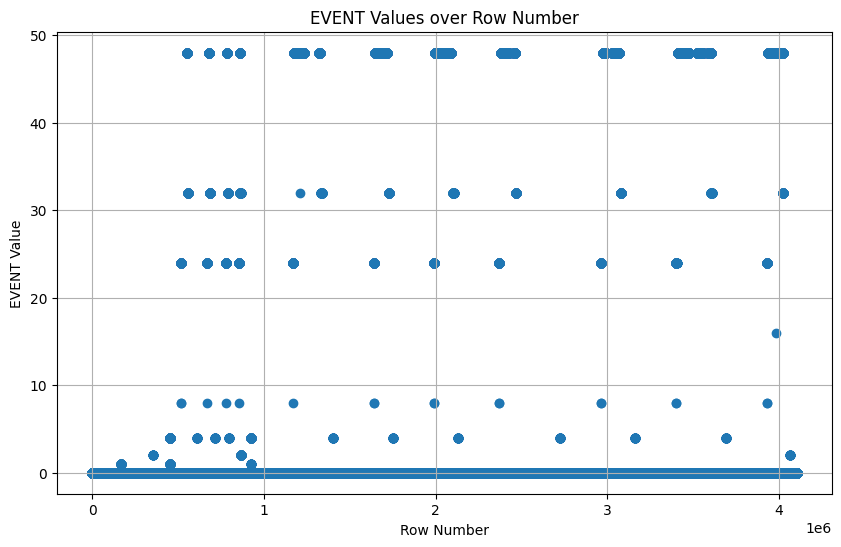

In [12]:
# Load DataFrame using the base_dir
df = pd.read_csv(base_dir + r"\ID03.csv", sep=';') 

# Print the DataFrame
print(df)

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Optional: sets the figure size
plt.scatter(df.index, df['EVENT'])  # df.index for row numbers, df['EVENT'] for EVENT column values

# Add labels and title
plt.xlabel('Row Number')
plt.ylabel('EVENT Value')
plt.title('EVENT Values over Row Number')

# Optional: add grid
plt.grid(True)

# Show the plot
plt.show()

### Cleaning Study_01 ID10

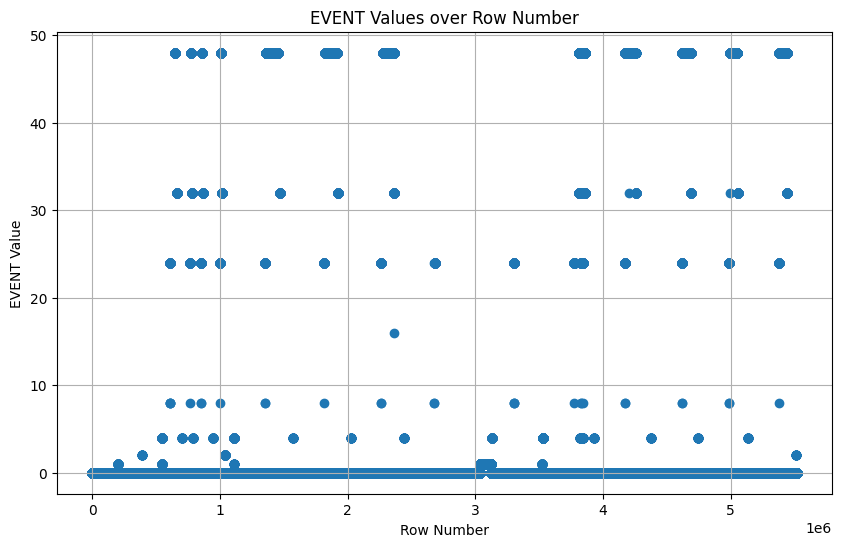

Count of 4: 810


c:\Users\CAyre\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


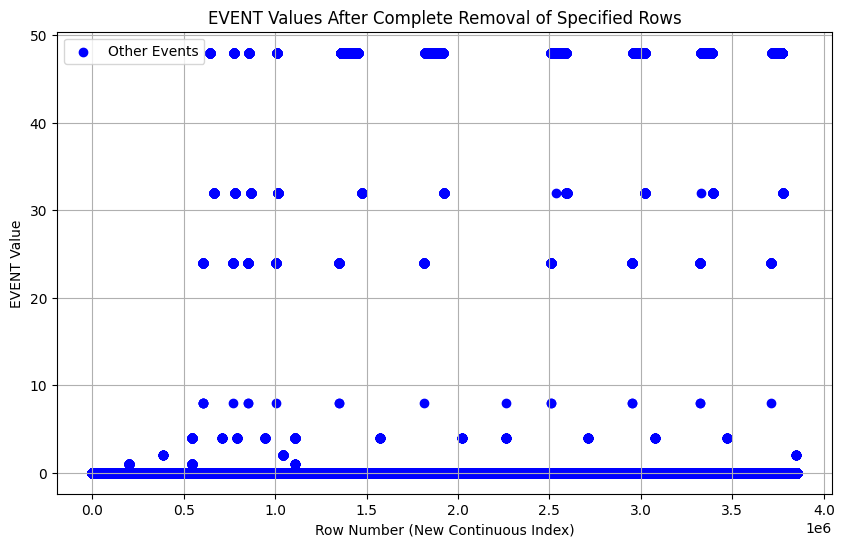

Cleaned data saved to C:\Users\CAyre\Documents\Coding\deepdream-analysis\Study_01\ECG\ACQ\ID10_clean.csv
Removed 1664013 rows between indices 2265263.0 and 3929275.0


In [9]:
import pandas as pd

# Set base directory
base_dir = r"C:\Users\CAyre\Documents\Coding\deepdream-analysis\Study_01\ECG\ACQ"

# Load DataFrame using the base_dir
df = pd.read_csv(base_dir + r"\ID10.csv", sep=';') 

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Optional: sets the figure size
plt.scatter(df.index, df['EVENT'])  # df.index for row numbers, df['EVENT'] for EVENT column values

# Add labels and title
plt.xlabel('Row Number')
plt.ylabel('EVENT Value')
plt.title('EVENT Values over Row Number')

# Optional: add grid
plt.grid(True)

# Show the plot
plt.show()

# Count occurrences of "4"
count_of_4 = df["EVENT"].value_counts()[4]

print(f"Count of 4: {count_of_4}")

# Create groups of consecutive same values in 'EVENT'
s = df['EVENT']
groups = s.ne(s.shift()).cumsum()
grouped = df.groupby(groups).apply(lambda x: pd.Series({
    'start_idx': x.index[0],
    'end_idx': x.index[-1],
    'value': x['EVENT'].iloc[0],
    'length': len(x)
})).reset_index(drop=True)

# Extract clusters of 8's and 4's
clusters_8 = grouped[grouped['value'] == 8].reset_index(drop=True)
clusters_4 = grouped[grouped['value'] == 4].reset_index(drop=True)

# Check for sufficient clusters
if len(clusters_8) < 7:
    raise ValueError(f"Not enough 8-clusters. Found {len(clusters_8)}, need at least 7.")
if len(clusters_4) < 4:
    raise ValueError(f"Not enough 4-clusters. Found {len(clusters_4)}, need at least 4.")

# Get indices for removal
seventh_8 = clusters_8.iloc[6]
fourth_from_last_4 = clusters_4.iloc[-4]

start_remove = seventh_8['end_idx']
end_remove = fourth_from_last_4['start_idx']

if start_remove >= end_remove:
    raise ValueError("The seventh 8-cluster ends after the fourth from last 4-cluster starts. Cannot remove rows.")

# Remove the rows between the clusters (inclusive)
mask = (df.index >= start_remove) & (df.index <= end_remove)
df_clean = df[~mask].copy()  # Use copy to avoid SettingWithCopyWarning

# Reset index to make it continuous
df_clean.reset_index(drop=True, inplace=True)

# Replot the cleaned data with new continuous indices
plt.figure(figsize=(10, 6))
plt.scatter(df_clean.index, df_clean['EVENT'], color='blue', label='Other Events')

# Add labels and title
plt.xlabel('Row Number (New Continuous Index)')
plt.ylabel('EVENT Value')
plt.title('EVENT Values After Complete Removal of Specified Rows')

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Save the cleaned data to a new CSV file
output_path = base_dir + r"\ID10_clean.csv"
df_clean.to_csv(output_path, sep=';', index=False)
print(f"Cleaned data saved to {output_path}")
print(f"Removed {len(df) - len(df_clean)} rows between indices {start_remove} and {end_remove}")